In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns # Для графиков

import sklearn # Для стандартизации
from sklearn import preprocessing

import pandas
import tensorflow
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#dataf = pd.read_csv('drive/MyDrive/code/df_MinMax.csv', header = 0)
#dataf = dataf.drop(columns = ["Volume", 'Hour'])
#dataset = dataf.values
#dataf1 = pd.read_csv('drive/MyDrive/code/result_second.csv', header = 0)
#dataf1 = dataf1.drop(columns = ["Volume"])
#dataset1 = dataf1.values
#dataset

In [ ]:
dataf = pd.read_csv('drive/MyDrive/code/df.csv', header = 0)
dataf = dataf.loc[((dataf['Month']!=12)|(dataf['Day']!=31)|(dataf['Day of Week']!=0))]

dataset = dataf.values
dataset

array([[ 1.   ,  1.   ,  0.   ,  1.   ,  1.25 ],
       [ 1.   ,  1.   ,  0.   ,  2.   ,  1.75 ],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.125],
       ...,
       [12.   , 31.   , 21.   ,  1.   ,  5.375],
       [12.   , 31.   , 22.   ,  1.   ,  4.5  ],
       [12.   , 31.   , 23.   ,  1.   ,  2.625]])

In [ ]:

dataf = pd.read_csv('drive/MyDrive/code/data_15.csv', header = 0)
#dataf = dataf.loc[((dataf['Month']!=12)|(dataf['Day']!=31)|(dataf['Day of Week']!=0))]

dataset = dataf.values
dataset

array([[ 1.   ,  1.   ,  0.   ,  1.   ,  1.25 ],
       [ 1.   ,  1.   ,  0.   ,  2.   ,  1.75 ],
       [ 1.   ,  1.   ,  1.   ,  1.   ,  1.125],
       ...,
       [12.   , 31.   , 21.   ,  1.   ,  3.75 ],
       [12.   , 31.   , 22.   ,  1.   ,  3.625],
       [12.   , 31.   , 23.   ,  1.   ,  5.625]])

In [ ]:
X = dataset[:, 0:4]
Y = dataset[:, 4]

X1 = np.ones((X.shape[0]-5, 5, 5))
for i in range (5, len(dataset)):
  X1[i-5] = dataset[i-5:i, :]
Y1 = dataset[5:, 4]

X1 




array([[[ 1.   ,  1.   ,  0.   ,  1.   ,  1.25 ],
        [ 1.   ,  1.   ,  0.   ,  2.   ,  1.75 ],
        [ 1.   ,  1.   ,  1.   ,  1.   ,  1.125],
        [ 1.   ,  1.   ,  1.   ,  2.   ,  2.125],
        [ 1.   ,  1.   ,  2.   ,  1.   ,  1.5  ]],

       [[ 1.   ,  1.   ,  0.   ,  2.   ,  1.75 ],
        [ 1.   ,  1.   ,  1.   ,  1.   ,  1.125],
        [ 1.   ,  1.   ,  1.   ,  2.   ,  2.125],
        [ 1.   ,  1.   ,  2.   ,  1.   ,  1.5  ],
        [ 1.   ,  1.   ,  2.   ,  2.   ,  1.75 ]],

       [[ 1.   ,  1.   ,  1.   ,  1.   ,  1.125],
        [ 1.   ,  1.   ,  1.   ,  2.   ,  2.125],
        [ 1.   ,  1.   ,  2.   ,  1.   ,  1.5  ],
        [ 1.   ,  1.   ,  2.   ,  2.   ,  1.75 ],
        [ 1.   ,  1.   ,  3.   ,  1.   ,  0.875]],

       ...,

       [[12.   , 31.   , 16.   ,  1.   ,  7.625],
        [12.   , 31.   , 17.   ,  1.   ,  6.375],
        [12.   , 31.   , 18.   ,  1.   ,  5.125],
        [12.   , 31.   , 19.   ,  1.   ,  4.25 ],
        [12.   , 31.   , 20.   

In [ ]:
V= dataset[-48:]
V

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder

In [ ]:
from keras import backend as K

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error, r2_score


In [ ]:
from tensorflow import convert_to_tensor

In [ ]:
def r_sqrt (species, predictions):
  q1 = K.sum(K.square(species - predictions))
  q2 = K.sum(K.square(species - K.mean(convert_to_tensor(species))))
  return 1 - q1 / (q2 + K.epsilon())


Для денормализации загруженности

In [ ]:
max = 45.875
min = 0

Метрики проверки

In [ ]:
def metrics_ (species, predictions):
  mse = mean_squared_error(species, predictions)
  mae = mean_absolute_error(species, predictions)
  determination_coefficient = r2_score(species, predictions)
  print("MSE:", mse)
  print("MAE:", mae)
  print("Determination coefficient:", determination_coefficient)

In [ ]:

def build_model():
    model = Sequential()
    model.add(Dense(500, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation="relu"))
    model.compile(optimizer='Adam', loss='mse')
    return model

def build_model_1():
    model = Sequential()
    model.add(LSTM(500, activation='relu', input_shape = 
                   (5,5), return_sequences= True))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation="relu"))
    model.compile(optimizer='adam', loss='mse')
    return model

def train_model(X, Y, model):
    train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.1,
                                                        random_state=42)
    model = build_model()
    history = model.fit(train_x, train_y, epochs=1, batch_size=8,
                        validation_data=(test_x, test_y))
    return history


def create_graphics(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    

Линейная регрессия

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)#
# Обучаем на тренировочных данных
model.fit(train_x, train_y)
# Действующая классификация
rf_predictions = model.predict(test_x)

species = np.array(test_y) #исходные
predictions = np.array(rf_predictions) #предсказания
#print("\nTEST_Y\n", species)
#print("\nPREDICTIONS\n", predictions)

metrics_ (species, predictions)

#predictions = predictions*(max-min) + min
#species = species*(max-min) + min

metrics_ (species, predictions)

ver = abs(predictions - species)
lenght = len(ver)

count = 0
for i in ver:
    if i <= 3:
        count = count + 1

print(count, lenght)
print(count / lenght)
#create_graphics(history)

LinearRegression()

MSE: 44.21900890152723
MAE: 4.405558130853496
Determination coefficient: 0.08341829323549177
MSE: 44.21900890152723
MAE: 4.405558130853496
Determination coefficient: 0.08341829323549177
3325 6905
0.48153511947863864


NN

Epoch 1/20
806/806 [==============================] - 4s 4ms/step - loss: 38.2594 - val_loss: 36.4123
Epoch 2/20
806/806 [==============================] - 3s 4ms/step - loss: 34.6262 - val_loss: 33.6835
Epoch 3/20
806/806 [==============================] - 3s 3ms/step - loss: 32.5825 - val_loss: 32.9400
Epoch 4/20
806/806 [==============================] - 3s 4ms/step - loss: 30.3521 - val_loss: 27.3355
Epoch 5/20
806/806 [==============================] - 3s 4ms/step - loss: 27.4078 - val_loss: 30.6116
Epoch 6/20
806/806 [==============================] - 3s 4ms/step - loss: 25.5181 - val_loss: 24.4138
Epoch 7/20
806/806 [==============================] - 3s 4ms/step - loss: 24.4424 - val_loss: 25.9628
Epoch 8/20
806/806 [==============================] - 3s 4ms/step - loss: 22.8008 - val_loss: 23.7363
Epoch 9/20
806/806 [==============================] - 3s 4ms/step - loss: 22.0517 - val_loss: 21.5752
Epoch 10/20
806/806 [==============================] - 3s 4ms/step - loss: 21.5225

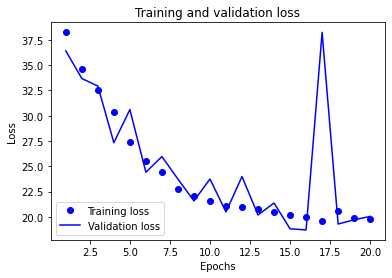

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3,
                                                        random_state=42)

model = build_model()
history = model.fit(train_x, train_y, epochs=20, batch_size=20,
                        validation_data=(test_x, test_y))
rf_predictions = model.predict(test_x)
#print("\n", rf_predictions, "\n")

species = np.array(test_y)
#print("\nTEST_Y\n", species)
predictions = np.array(rf_predictions)
#print("\nPREDICTIONS\n", predictions)
lenght = len(predictions)
pred = np.array(predictions.reshape(lenght))

metrics_ (species, pred)
#print("\nPRED\n",pred)
print(range(lenght))

#pred= pred*(max-min) + min
#species = species*(max-min) + min
#для species аналогично
metrics_ (species, pred)
#r_sqrt (species, pred)
ver = abs(pred - species) #

count = 0
for i in ver:
    if i <= 5:#подкорректировать под значения
        count = count + 1

print(count, lenght)
print(count / lenght)
create_graphics(history)

#коэффициент детерминации!!! выше чем 0.6 - гуд
#mae??

In [ ]:
pred

array([ 5.523174 ,  1.993408 ,  0.       , ...,  6.0294733, 12.764126 ,
        5.7394805], dtype=float32)

In [ ]:
S = dataf.drop(labels)
S


NameError: ignored

In [ ]:
PRED = dataset[-24:,:4]#.reshape((24,4))
S = dataset[-24:,4]
S
PRED.shape
pp = model.predict(PRED)
for i in range(1,len(pp)):
   print(pp[i])

array([1.   , 0.375, 0.   , 0.   , 0.   , 0.   , 0.   , 0.125, 0.25 ,
       1.   , 2.25 , 4.   , 4.625, 6.25 , 5.125, 4.5  , 5.25 , 5.25 ,
       5.   , 5.5  , 4.875, 4.875, 4.   , 2.875])

(24, 4)

[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.8402582]
[1.878922]
[3.3000882]
[4.7540603]
[5.9028134]
[6.3438754]
[6.2085395]
[6.061539]
[5.7897034]
[5.5396733]
[5.309243]
[5.010112]
[4.5880494]
[4.0146513]
[3.121804]
[2.201377]


In [ ]:
p = np.array([[12, 1 , 3, 5], [12, 1 , 3, 5]]).reshape(((2, 4)))
model.predict(p)

array([[0.],
       [0.]], dtype=float32)

RNN

Epoch 1/20
119/119 [==============================] - 11s 69ms/step - loss: 7.9592 - val_loss: 3.2217
Epoch 2/20
119/119 [==============================] - 7s 62ms/step - loss: 5.1785 - val_loss: 2.6715
Epoch 3/20
119/119 [==============================] - 7s 63ms/step - loss: 4.8914 - val_loss: 2.7390
Epoch 4/20
119/119 [==============================] - 8s 65ms/step - loss: 4.4531 - val_loss: 2.6564
Epoch 5/20
119/119 [==============================] - 7s 60ms/step - loss: 3.9946 - val_loss: 2.6120
Epoch 6/20
119/119 [==============================] - 8s 64ms/step - loss: 3.7705 - val_loss: 2.8046
Epoch 7/20
119/119 [==============================] - 8s 68ms/step - loss: 3.4965 - val_loss: 2.5911
Epoch 8/20
119/119 [==============================] - 8s 66ms/step - loss: 3.8048 - val_loss: 2.3443
Epoch 9/20
119/119 [==============================] - 8s 70ms/step - loss: 3.8776 - val_loss: 2.3578
Epoch 10/20
119/119 [==============================] - 8s 67ms/step - loss: 3.1667 - val_l

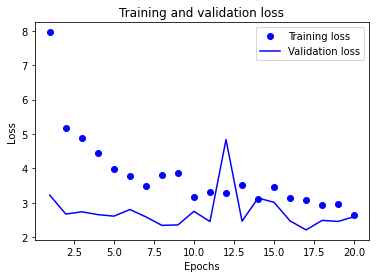

dict_keys(['loss', 'val_loss'])


No handles with labels found to put in legend.


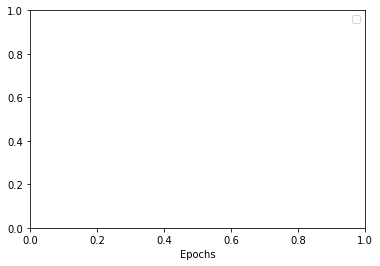

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X1, Y1, test_size=0.3,
                                                        random_state=42)

model = build_model_1()
history = model.fit(train_x, train_y, epochs=20, batch_size=20,
                        validation_data=(test_x, test_y))
rf_predictions = model.predict(test_x)
#print("\n", rf_predictions, "\n")

species = np.array(test_y)
#print("\nTEST_Y\n", species)
predictions = np.array(rf_predictions)
#print("\nPREDICTIONS\n", predictions)
lenght = len(predictions)
pred = np.array(predictions.reshape(lenght))

metrics_ (species, pred)
#print("\nPRED\n",pred)
print(range(lenght))

#pred= pred*(max-min) + min
#species = species*(max-min) + min

metrics_ (species, pred)
#r_sqrt (species, pred)
ver = abs(pred - species) #

count = 0
for i in ver:
    if i <= 3:
        count = count + 1

print(count, lenght)
print(count / lenght)
create_graphics(history)
#коэффициент детерминации!!! выше чем 0.6 - гуд
#mae??

In [ ]:
#model.save('drive/MyDrive/code/RNN_pr821_r66.h5')

In [ ]:
#model = keras.models.load_model('drive/MyDrive/code/q.h5')

In [ ]:
S = dataf [-24:]
S["KITS ID"] = [15, 15,15,15,15,15,15, 15,15,15,15,15,15, 15,15,15,15,15,15, 15,15,15,15,15]
S
S.to_csv('drive/MyDrive/code/KG_base.csv', index=False)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Month,Day,Hour,Day of Week,Occupancy,KITS ID
3360,12,31,0,0,1.000,15
3361,12,31,1,0,0.375,15
3362,12,31,2,0,0.000,15
3363,12,31,3,0,0.000,15
3364,12,31,4,0,0.000,15
3365,12,31,5,0,0.000,15
3366,12,31,6,0,0.000,15
3367,12,31,7,0,0.125,15
3368,12,31,8,0,0.250,15
3369,12,31,9,0,1.000,15


In [ ]:
V= dataset[-29:]
V
V1 = dataset[-24:,4]
V1

array([[12.        , 30.        , 19.        ,  0.        ,  7.        ],
       [12.        , 30.        , 20.        ,  0.        ,  3.        ],
       [12.        , 30.        , 21.        ,  0.        ,  2.        ],
       [12.        , 30.        , 22.        ,  0.        ,  1.375     ],
       [12.        , 30.        , 23.        ,  0.        ,  0.875     ],
       [12.        , 31.        ,  0.        ,  0.        ,  1.60340869],
       [12.        , 31.        ,  1.        ,  0.        ,  1.27668095],
       [12.        , 31.        ,  2.        ,  0.        ,  0.28711474],
       [12.        , 31.        ,  3.        ,  0.        ,  0.        ],
       [12.        , 31.        ,  4.        ,  0.        ,  0.        ],
       [12.        , 31.        ,  5.        ,  0.        ,  0.        ],
       [12.        , 31.        ,  6.        ,  0.        ,  0.        ],
       [12.        , 31.        ,  7.        ,  0.        ,  0.46381259],
       [12.        , 31.        ,  8. 

array([1.60340869, 1.27668095, 0.28711474, 0.        , 0.        ,
       0.        , 0.        , 0.46381259, 1.59564066, 2.45243692,
       3.51366544, 4.70450306, 5.60774803, 6.0112648 , 5.99984789,
       5.70369482, 5.42442179, 5.06975746, 4.67296553, 4.25639772,
       3.83362484, 3.42171788, 3.00106812, 2.57558393])

In [ ]:
species = np.array(V1)
#V = V[0:5]
pred = []
for i in range(0, 24):  
  PRED = V[i:5+i]
  PRED = PRED.reshape((1,PRED.shape[0], PRED.shape[1]))
  #PRED.shape
  ppp = model.predict(PRED)
  ppp
  pred.append(ppp[0])
  print('/n')
  #V[0:4] = V[1:5]
  #V[4] = ppp
  #V
  V[5+i][4] = ppp
#V

predictions = np.array(pred)
#print("\nPREDICTIONS\n", predictions)
lenght = len(predictions)
pred = np.array(predictions.reshape(lenght))

pred
species
metrics_ (species, pred)
#r_sqrt (species, pred)
ver = abs(pred- species) #

count = 0
for i in ver:
    if i <= 3:#подкорректировать под значения
        count = count + 1

print(count, lenght)
print(count / lenght)

array([[1.1535087]], dtype=float32)

/n


array([[0.8201583]], dtype=float32)

/n


array([[0.29215717]], dtype=float32)

/n


array([[0.]], dtype=float32)

/n


array([[0.]], dtype=float32)

/n


array([[0.]], dtype=float32)

/n


array([[0.]], dtype=float32)

/n


array([[0.03157105]], dtype=float32)

/n


array([[0.6143397]], dtype=float32)

/n


array([[1.5190387]], dtype=float32)

/n


array([[2.482867]], dtype=float32)

/n


array([[3.6088488]], dtype=float32)

/n


array([[4.9951177]], dtype=float32)

/n


array([[6.5203047]], dtype=float32)

/n


array([[7.7245016]], dtype=float32)

/n


array([[8.176138]], dtype=float32)

/n


array([[7.3284774]], dtype=float32)

/n


array([[6.1193686]], dtype=float32)

/n


array([[5.14265]], dtype=float32)

/n


array([[4.348609]], dtype=float32)

/n


array([[3.5704625]], dtype=float32)

/n


array([[2.7412915]], dtype=float32)

/n


array([[1.8496618]], dtype=float32)

/n


array([[1.2459216]], dtype=float32)

/n


array([1.1535087 , 0.8201583 , 0.29215717, 0.        , 0.        ,
       0.        , 0.        , 0.03157105, 0.6143397 , 1.5190387 ,
       2.482867  , 3.6088488 , 4.9951177 , 6.5203047 , 7.7245016 ,
       8.176138  , 7.3284774 , 6.1193686 , 5.14265   , 4.348609  ,
       3.5704625 , 2.7412915 , 1.8496618 , 1.2459216 ], dtype=float32)

array([1.25889683, 0.68889648, 0.32598528, 0.        , 0.        ,
       0.        , 0.        , 0.13241968, 0.56898576, 1.35573137,
       2.31928444, 3.50805092, 4.80160046, 5.84879541, 6.33214426,
       6.04189539, 5.18167353, 4.36223698, 3.73920012, 3.17595363,
       2.55085158, 1.88321602, 1.29885089, 1.21777225])

MSE: 0.8420198452450111
MAE: 0.5905284279336532
Determination coefficient: 0.8086667202557889
24 24
1.0


In [ ]:
metrics_(species, pred)

MSE: 0.8420198452450111
MAE: 0.5905284279336532
Determination coefficient: 0.8086667202557889


In [ ]:
count = 0
for i in ver:
    if i <= 2:#подкорректировать под значения
        count = count + 1

print(count, lenght)
print(count / lenght)

22 24
0.9166666666666666


In [ ]:
PRED = np.array([[[12.        , 31.        ,  7.        ,  0.        ,  0.26010269],
       [12.        , 31.        ,  8.        ,  0.        ,  0.67761683],
       [12.        , 31.        ,  9.        ,  0.        ,  1.54311645],
       [12.        , 31.        , 10.        ,  0.        ,  2.58543634],
       [12.        , 31.        , 11.        ,  0.        ,  3.64745331]]])
     
#нормируем
#PRED.shape
ppp = model.predict(PRED)
ppp

array([[4.590257]], dtype=float32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

Случайный лес

In [ ]:
# Создаём модель леса из сотни деревьев
model = RandomForestRegressor(max_depth=4, random_state=42)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)
    # Обучаем на тренировочных данных
model.fit(train_x, train_y)
    # Действующая классификация
rf_predictions = model.predict(test_x)
    # Вероятности для каждого класса
    #rf_probs = model.predict_proba(test_x)[:, 1]

species = np.array(test_y)
predictions = np.array(rf_predictions)

metrics_ (species, predictions)

#predictions= predictions*(max-min) + min
#species = species*(max-min) + min

metrics_ (species, predictions)

ver = abs(predictions - species)
lenght = len(ver)

count = 0
for i in ver:
    if i <= 3:
        count = count + 1

print(count, lenght)
print(count / lenght)

RandomForestRegressor(max_depth=4, random_state=42)

MSE: 10.556526998079327
MAE: 1.607358299157049
Determination coefficient: 0.6116276985905902
MSE: 10.556526998079327
MAE: 1.607358299157049
Determination coefficient: 0.6116276985905902
883 1030
0.8572815533980582


MLP регрессия

In [ ]:
from sklearn.neural_network import MLPRegressor
#model = LinearRegression()
model = MLPRegressor()
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)
# Обучаем на тренировочных данных
model.fit(train_x, train_y)
# Действующая классификация
rf_predictions = model.predict(test_x)

species = np.array(test_y)
predictions = np.array(rf_predictions)

metrics_ (species, predictions)

#predictions= predictions*(max-min) + min
#species = species*(max-min) + min

metrics_ (species, predictions)

ver = abs(predictions - species)
lenght = len(ver)

count = 0
for i in ver:
    if i <= 3:
        count = count + 1

print(count, lenght)
print(count / lenght)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor()


Metrics errors
MSE: 24.447568987301445
MAE: 2.9149809407492815
R2: 0.47982757383604235

Metrics errors
MSE: 24.447568987301445
MAE: 2.9149809407492815
R2: 0.47982757383604235
4823 6912
0.6977719907407407


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

К-ближайших соседей

In [ ]:
model = KNeighborsRegressor(n_neighbors=10)
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3, random_state=42)
# Обучаем на тренировочных данных
model.fit(train_x, train_y)
# Действующая классификация
rf_predictions = model.predict(test_x)
# Вероятности для каждого класса
#rf_probs = model.predict_proba(test_x)[:, 1]

species = np.array(test_y)
predictions = np.array(rf_predictions)

metrics_ (species, predictions)

#predictions= predictions*(max-min) + min
#species = species*(max-min) + min

metrics_ (species, predictions)

ver = abs(predictions - species)
lenght = len(ver)

count = 0
for i in ver:
    if i <= 3:
        count = count + 1

print(count, lenght)
print(count / lenght)

KNeighborsRegressor(n_neighbors=10)

MSE: 9.4315981268025
MAE: 1.5931195099398983
Determination coefficient: 0.6530135838101476
MSE: 9.4315981268025
MAE: 1.5931195099398983
Determination coefficient: 0.6530135838101476
892 1030
0.8660194174757282
